In [76]:
import pandas as pd
%pylab inline
import numpy as np
import pylab as pl
import scipy as sp
from scipy import stats
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


I extracted precipitations records for Willmington from 2000/01/01 through today. 
The goal is to extract from these data the daily precipitation starting on 2018/01/01 and assess if these data are different from a population with mean $\mu = 0.14$ standard deviation $\sigma= 0.38$. 

Set a p-value at $2\sigma$:  $p=0.05$

In [2]:
rain = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS/master/labs/1865331.csv")
rain.columns

Index(['STATION', 'NAME', 'DATE', 'PRCP', 'SNOW', 'SNWD', 'WESD', 'WESF'], dtype='object')


The $Z$ statistics is : $Z = \frac{\bar{X} - \mu }{s}$ and $s = \sigma / \sqrt(N)$ (you should know what all those symbols mean)

1. Extract from the dataframe above the columns "DATE" and "PRCP" (precipitation)

2. Convert the dataframe DATE from ```string``` to ```datetime``` type
 using pd.datetime() 
    
3. Select the data rows with date later than 2018/01/01. 
    If your data type conversion worked well you should be able to set the condition as ```rain[<newcolumnname>]> pd.datetime("2018/01/01")```
    use the technique called "broadcasting" to select the rows: 
    
    ```rain[ rain[<newcolumnname>]> pd.datetime("2018/01/01")]``` which you can save as a new dataframe
    
4. Calculate the mean of the sample you created $\bar{X}$ and plug it in  the numerator of the $Z$ statistics: $\bar{X}- \mu$

5. Calculate the size of the sample and plug it in the formula. Now you have $Z$

6. Knowing the distribution of $Z\sim N(\mu=0, \sigma=1)$ and with a confidence $p=0.05$, did you find that the time period 2018/01/01---today has a statistically significant different amount of rain?  
    

In [3]:
rainonly=rain[["DATE","PRCP"]]
rainonly.head()
rainonly.DATE.dtype

dtype('O')

In [4]:
rainonly['DATE']=pd.to_datetime(rainonly.DATE)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
rainonly.head()

,DATE,PRCP
0,2010-01-01,0.28
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-05,0.00


In [0]:
recent = rainonly[rainonly['DATE']>pd.to_datetime("2018/01/01")]

In [7]:
recent.describe()

,PRCP
count,615.000000
mean,0.162504
std,0.365007
min,0.000000
25%,0.000000
50%,0.000000
75%,0.120000
max,2.450000


In [8]:
rainonly.PRCP.describe()

count    3538.000000
mean        0.137340
std         0.382174
min         0.000000
25%         0.000000
50%         0.000000
75%         0.070000
max         6.960000
Name: PRCP, dtype: float64

this is $\frac{\bar X-\mu}{\sigma}\sqrt{N}$:

In [9]:
(0.162504-0.137340)/(0.38*(615**(-0.5)))

1.6422287003201257

No, it does not appear that it is significantly higher. For $p<0.05$, the $z$ value would have to be greater than 2 (or less than -2 for statistically significantly less rainfall)

# `HERE BEGINS PART 2`

### `1 What is the test's Null Hypothsis that the K-S test tests?`

*The K-S test's Null Hypothesis is that the two datasets being compared were generated from the same parent distribution.*

---

### `2 What is the "statistic" or "pivotal quantity" that the test uses?`

*It bases it's result off of the greatest distance between the two sampless' Cumulative Distribution Functions*

---

### `3 What does the probability distribution of this statistic depend on?`

*The maximum distance noted above and the sizes of the two samples*

Specifically the null hyponthesis is rejected at a confidence level $\alpha$ if the maximum distance between the two CDFs obeys:

$\displaystyle{D_{m,n}>\sqrt{-\frac{1}{2}\ln\alpha\cdot \frac{n+m}{nm}}}$

In [0]:
quakes_raw=pd.read_csv("https://raw.githubusercontent.com/sheamusfitz/DSPS_jFitzgerald/master/HW3/quakes.csv",sep=" ")

I modified the formatting of this data in a slightly different manner. In vim I ran a search over the data, replacing all instances of "{space}{space}" with "{space}". I repeated this until there were no more instances of "{space}{space}".

In [11]:
quakes_raw.head()

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.246,-116.433,1.6,C,28255.0,13.0,17.0
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259.0,18.0,42.0
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260.0,13.0,30.0
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.668,-116.780,13.8,C,28270.0,19.0,40.0
4,1984/01/01,19:38:19.79,eq,l,2.13,c,33.963,-116.290,2.7,C,28553.0,40.0,49.0


In [12]:
quakes_raw.shape

(71446, 13)

In [13]:
quakes_raw.describe()

,MAG,LAT,LON,DEPTH,EVID,NPH,NGRM
count,71446.000000,71445.000000,71445.000000,71445.000000,7.144500e+04,71445.000000,71445.000000
mean,3.411610,33.960072,-116.843646,5.821510,4.147678e+06,32.018980,203.164574
std,267.281389,1.080535,1.024872,3.976313,3.929716e+06,24.046221,268.520695
min,2.000000,31.820000,-119.854000,0.000000,2.825500e+04,0.000000,0.000000
25%,2.120000,33.097000,-117.662000,3.000000,7.420180e+05,16.000000,63.000000
50%,2.300000,34.045000,-116.580000,5.300000,3.059672e+06,26.000000,122.000000
75%,2.580000,34.568000,-116.247330,7.100000,9.026978e+06,40.000000,242.000000
max,71445.000000,36.628000,-114.237000,29.300000,3.736673e+07,554.000000,3846.000000


whoops, it's taking the number of events as a magnitude, that's no good!

In [0]:
quakes_raw = quakes_raw.drop([71445],axis=0)

In [15]:
quakes_raw.describe()

,MAG,LAT,LON,DEPTH,EVID,NPH,NGRM
count,71445.000000,71445.000000,71445.000000,71445.000000,7.144500e+04,71445.000000,71445.000000
mean,2.411658,33.960072,-116.843646,5.821510,4.147678e+06,32.018980,203.164574
std,0.405114,1.080535,1.024872,3.976313,3.929716e+06,24.046221,268.520695
min,2.000000,31.820000,-119.854000,0.000000,2.825500e+04,0.000000,0.000000
25%,2.120000,33.097000,-117.662000,3.000000,7.420180e+05,16.000000,63.000000
50%,2.300000,34.045000,-116.580000,5.300000,3.059672e+06,26.000000,122.000000
75%,2.580000,34.568000,-116.247330,7.100000,9.026978e+06,40.000000,242.000000
max,7.100000,36.628000,-114.237000,29.300000,3.736673e+07,554.000000,3846.000000


much better

In [16]:
quakes_raw=quakes_raw.rename(index=str,columns={"#YYY/MM/DD": "date", "HH:mm:SS.ss": "time", "MAG": "mag"});
quakes_raw.head()

,date,time,ET,GT,mag,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.246,-116.433,1.6,C,28255.0,13.0,17.0
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259.0,18.0,42.0
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260.0,13.0,30.0
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.668,-116.780,13.8,C,28270.0,19.0,40.0
4,1984/01/01,19:38:19.79,eq,l,2.13,c,33.963,-116.290,2.7,C,28553.0,40.0,49.0


In [17]:
eqdata = quakes_raw[["date","time","mag"]]
eqdata.head()

#rainonly=rain[["DATE","PRCP"]]
#rainonly.head()
#rainonly.DATE.dtype

,date,time,mag
0,1984/01/01,01:30:57.52,2.02
1,1984/01/01,05:31:34.16,2.12
2,1984/01/01,06:59:05.14,2.43
3,1984/01/01,11:10:25.29,2.07
4,1984/01/01,19:38:19.79,2.13


In [18]:
eqdata.date.dtype, eqdata.time.dtype

(dtype('O'), dtype('O'))

In [19]:
eqdata.head()

,date,time,mag
0,1984/01/01,01:30:57.52,2.02
1,1984/01/01,05:31:34.16,2.12
2,1984/01/01,06:59:05.14,2.43
3,1984/01/01,11:10:25.29,2.07
4,1984/01/01,19:38:19.79,2.13


In [20]:
test=[1,3,5];
test[1]
eqdata['date'][2]
eqdata['time'][2]

'06:59:05.14'

In [0]:
#pd.to_datetime(eqdata['date'][2]*eqdata['time'][2])

In [22]:
timestamps=np.empty(len(eqdata),dtype=pd.datetime)
print(timestamps)

[None None None ... None None None]


There were a few entries with a time of `"HH:MM:60.00"` which the pandas disliked, so again I replaced all instances of `:60.00` with `:59.99`.

In [23]:
for i in range(len(eqdata)):
  #print(i)
  thisdate=f"{eqdata['date'][i]} {eqdata['time'][i]}"
  #print(timestamps[i])
  thisdate=pd.to_datetime(thisdate)
  timestamps[i]=thisdate#pd.to_datetime(thisdate, format="%Y/%m/%d %H:%M:%S.%f")
  #print(timestamps[i],"\n")
print("done")

done


In [24]:
eqdata['timestamps']=timestamps

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
eqdata

,date,time,mag,timestamps
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790
5,1984/01/01,19:39:19.67,2.13,1984-01-01 19:39:19.670
6,1984/01/01,20:19:47.21,2.02,1984-01-01 20:19:47.210
7,1984/01/02,05:00:12.44,3.24,1984-01-02 05:00:12.440
8,1984/01/02,05:02:17.29,2.17,1984-01-02 05:02:17.290
9,1984/01/02,06:18:52.16,2.48,1984-01-02 06:18:52.160


In [26]:
#testing
eqdata['timestamps'][4]-eqdata['timestamps'][3]

Timedelta('0 days 08:27:54.500000')

In [27]:
# create empty container
ss = []

# loop through all year pairs as year and fraction of year
for t in [(1984, 1986.5), 
          (1990.3, 1992.1), 
          (1994.6, 1995.6),
          (1996.1,1996.5), 
          (1997,1997.6), 
          (1997.75,1998.15), 
          (1998.25,1999.35), 
          (2000.55,2000.8),
          (2000.9 ,2001.25), 
          (2001.6 ,2002), 
          (2002.5 ,2003)]:
  
    ss.append((pd.to_datetime(int(t[0]), format="%Y") 
        + pd.Timedelta('%.f days'%((t[0] - int(t[0])) * 365.25)),
               pd.to_datetime(int(t[1]), format="%Y") 
        + pd.Timedelta('%.f days'%((t[1] - int(t[1])) * 365.25))))

gooddates=0
for i in range(11):
  gooddates+=((eqdata.timestamps >= ss[i][0]) & (eqdata.timestamps <= ss[i][1]))

gooddates = (gooddates == True ).astype(bool)
gooddates

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
71415    False
71416    False
71417    False
71418    False
71419    False
71420    False
71421    False
71422    False
71423    False
71424    False
71425    False
71426    False
71427    False
71428    False
71429    False
71430    False
71431    False
71432    False
71433    False
71434    False
71435    False
71436    False
71437    False
71438    False
71439    False
71440    False
71441    False
71442    False
71443    False
71444    False
Name: timestamps, Length: 71445, dtype: bool

In [28]:
print(gooddates.sum())

17386


In [0]:
eqgood = eqdata.where(gooddates).dropna()

In [30]:
eqgood.head()

,date,time,mag,timestamps
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790


In [31]:
eqgood['timestamps'][13000]

Timestamp('1998-05-01 11:05:50.420000')

okay cool it does what i want

In [0]:
tilnext=np.diff(pd.Series(eqgood.timestamps).array)

In [33]:
tilnext

array([14436640000000,  5250980000000, 15080150000000, ...,
        1459920000000, 19148060000000, 37530890000000],
      dtype='timedelta64[ns]')

In [0]:
if tilnext[0].astype(int)!=0:
  tilnext=np.insert(tilnext, 0,0)

In [35]:
tilnext

array([             0, 14436640000000,  5250980000000, ...,
        1459920000000, 19148060000000, 37530890000000],
      dtype='timedelta64[ns]')

In [0]:
eqgood['tilnext']=tilnext.astype(int)

In [37]:
eqgood.head()

,date,time,mag,timestamps,tilnext
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520,0
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160,14436640000000
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140,5250980000000
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290,15080150000000
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790,30474500000000


In [0]:
eqgood = eqgood.drop(['0'],axis=0)

In [39]:
eqgood.head()

,date,time,mag,timestamps,tilnext
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160,14436640000000
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140,5250980000000
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290,15080150000000
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790,30474500000000
5,1984/01/01,19:39:19.67,2.13,1984-01-01 19:39:19.670,59880000000


In [40]:
eqgood.describe()

,mag,tilnext
count,17385.000000,1.738500e+04
mean,2.385727,3.448969e+13
std,0.384233,1.149716e+15
min,2.000000,1.700000e+08
25%,2.110000,2.921420e+12
50%,2.280000,9.667640e+12
75%,2.540000,2.320878e+13
max,5.800000,1.199903e+17


(array([1.7379e+04, 3.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.70000000e+08, 1.19990336e+16, 2.39980671e+16, 3.59971005e+16,
        4.79961340e+16, 5.99951674e+16, 7.19942009e+16, 8.39932343e+16,
        9.59922678e+16, 1.07991301e+17, 1.19990335e+17]),
 <a list of 10 Patch objects>)

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


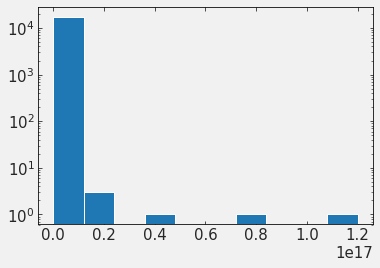

In [41]:
pl.hist(eqgood.tilnext,log=True)

$\color{red}{PLOT LABELS}$

In [42]:
eqgood = eqgood[eqgood.tilnext <= 2.5*10**15]
eqgood.describe()

,mag,tilnext
count,17375.000000,1.737500e+04
mean,2.385844,1.685512e+13
std,0.384292,2.039204e+13
min,2.000000,1.700000e+08
25%,2.110000,2.920040e+12
50%,2.280000,9.657150e+12
75%,2.540000,2.313566e+13
max,5.800000,2.365828e+14


(array([1.3135e+04, 2.8150e+03, 9.4600e+02, 3.1700e+02, 1.0100e+02,
        4.2000e+01, 1.0000e+01, 4.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([1.70000000e+08, 2.36584280e+13, 4.73166860e+13, 7.09749440e+13,
        9.46332020e+13, 1.18291460e+14, 1.41949718e+14, 1.65607976e+14,
        1.89266234e+14, 2.12924492e+14, 2.36582750e+14]),
 <a list of 10 Patch objects>)

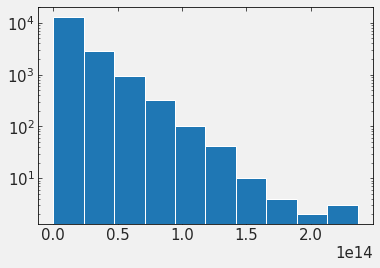

In [43]:
pl.hist(eqgood.tilnext,log=True)

I'm selecting an $\alpha$ threshold of $3\sigma$.


**I need to make a key for these variables...**

variable|meaning
-----|-----
$d_{kl}$  |  ks statistic between sets k,l
$N_e$  |  effective number of datapoints (definition here is strange)
$M_i$ | some magnitude specific to the sample/subset
$R_i$ | the occurrence rate for events of magnitude greater than $M_i$
$\tau$ | the inter-event time. note: $\langle\tau\rangle_i=R_i^{-1}$





In [44]:
eqgood.tilnext.values

array([14436640000000,  5250980000000, 15080150000000, ...,
        1459920000000, 19148060000000, 37530890000000])

In [55]:
thresholds = [0.01,0.001]
mag_list = [2.0,2.5,3.0,3.5,4.0]

tau_normd=np.empty([len(mag_list),len(thresholds)],dtype='O')

#print(tau_normd)

for threshold in thresholds:
  i = thresholds.index(threshold)
  for mk in range(len(mag_list)):
    tau_normd[mk][i]=eqgood.tilnext.where(eqgood.mag>mag_list[mk]).dropna()
    for _ in [1,2,3]:
      rk = 1/np.mean(tau_normd[mk][i])
      #print(rk)
      tau_normd[mk][i] = tau_normd[mk][i].where(tau_normd[mk][i]*rk>threshold).dropna()*rk
    #there were two lines in the pseudocode that were unnecessary, but I'll do them anyways.
    rk = 1/np.mean(tau_normd[mk][i])
    tau_normd[mk][i] = tau_normd[mk][i]*rk
      
    print("\n\n")
  for mk in range(len(mag_list)):
    for ml in range(mk+1,len(mag_list)):
      print(mk,ml)
      print(stats.ks_2samp(tau_normd[mk][i].values,tau_normd[ml][i].values))
      

for i in range(5):
  for j in [0,1]:
    print(len(tau_normd[i][j]))
















0 1
Ks_2sampResult(statistic=0.01646401614679427, pvalue=0.2988924217300161)
0 2
Ks_2sampResult(statistic=0.026143467057560765, pvalue=0.46579212837991557)
0 3
Ks_2sampResult(statistic=0.07063699966478432, pvalue=0.07869015564429575)
0 4
Ks_2sampResult(statistic=0.12829356999554092, pvalue=0.10857153243367323)
1 2
Ks_2sampResult(statistic=0.021496139481659394, pvalue=1.0)
1 3
Ks_2sampResult(statistic=0.060674947049273745, pvalue=0.1976817322234541)
1 4
Ks_2sampResult(statistic=0.12631452677036267, pvalue=0.11297757155874633)
2 3
Ks_2sampResult(statistic=0.05313430764467883, pvalue=0.44653933946712554)
2 4
Ks_2sampResult(statistic=0.12705959423512128, pvalue=0.1269977872439345)
3 4
Ks_2sampResult(statistic=0.09144913269289522, pvalue=0.5631282678202599)















0 1
Ks_2sampResult(statistic=0.022693722952343426, pvalue=0.044826450192210744)
0 2
Ks_2sampResult(statistic=0.037953932216514386, pvalue=0.0767506784664994)
0 3
Ks_2sampResult(statistic=0.08224477807680222,

## An explanation of my cumulative probability distribution method
So the cumulative distribution function plots the percentage of all entries with associated times shorter than the given value, for all values in the array.

Equivalently, I could just sort the array, enumerate each entry, and divide the enumeration by the number of entries. That is: the lowest entry has 0 shorter measurements in the set, the second lowest has 1, the third lowest has 2... So this is simply the index of the sorted measuement. These need to be normalized to a percent of the total sample rather than an integer number due to varied sub-sample sizes.

The cumulative distribution function is then the index of the value (normalized to a maximum of 1) as a function of the value (normalized to a mean of 1).

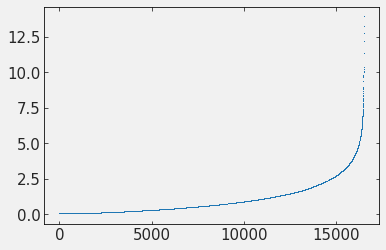

In [65]:
pl.plot(np.sort(tau_normd[0][1].values),',')

In [67]:
tau_sort = np.zeros_like(tau_normd)

for i in range(len(tau_normd)):
  for j in range(len(tau_normd[i])):
    tau_sort[i,j] = np.sort(tau_normd[i,j].values)

tau_sort[1]

array([array([1.01179314e-02, 1.02565171e-02, 1.02747986e-02, ...,
       1.00244457e+01, 1.03540890e+01, 1.39519032e+01]),
       array([1.01323487e-03, 1.04063643e-03, 1.05495997e-03, ...,
       1.05860163e+01, 1.09341264e+01, 1.47334906e+01])], dtype=object)

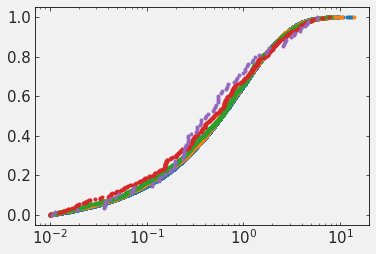

In [81]:
for i in range(len(tau_sort)):
  pl.plot(tau_sort[i][0],np.linspace(0,1,num=len(tau_sort[i][0])),'.')

pl.xscale('log')
